# **Install Package**

In [2]:
!pip install luwiji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.6 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.3-py2.py3-none-any.whl size=41032444 sha256=20fe18ce7c9ff673d5586d14d856445dbdfec5a933f270ce35a796032fceaeee
  Stored in directory: /root/.cache/pip/wheels/25/9b/68/61b665f8682276ffbc7fa54bae3ccc541be2ed103979770b9b
  Created wheel for jcopml: filename=jcopml-1.2.7-py2.py3-none-any.whl size=45916 sha256=4deb7f82e0e74a514fb8146374f6ed9fbec1fad77d7675df775cf2fc1db193ed
  Stored in directory: /root/.cache/pip/wheels/77/a7/60/c75983f4da5b630422325c5048591b6ee9e2ce123bf2b7b357
Successfully built luwiji jcopml


# **Import Package**

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from luwiji.knn import illustration, demo
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
demo.knn()

interactive(children=(IntSlider(value=1, description='N', max=11, min=1, step=2), FloatSlider(value=-5.0, desc…

# **Import Data**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_csv('drive/MyDrive/Machine Learning Basic/k-Nearest Neighbors/Data/titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


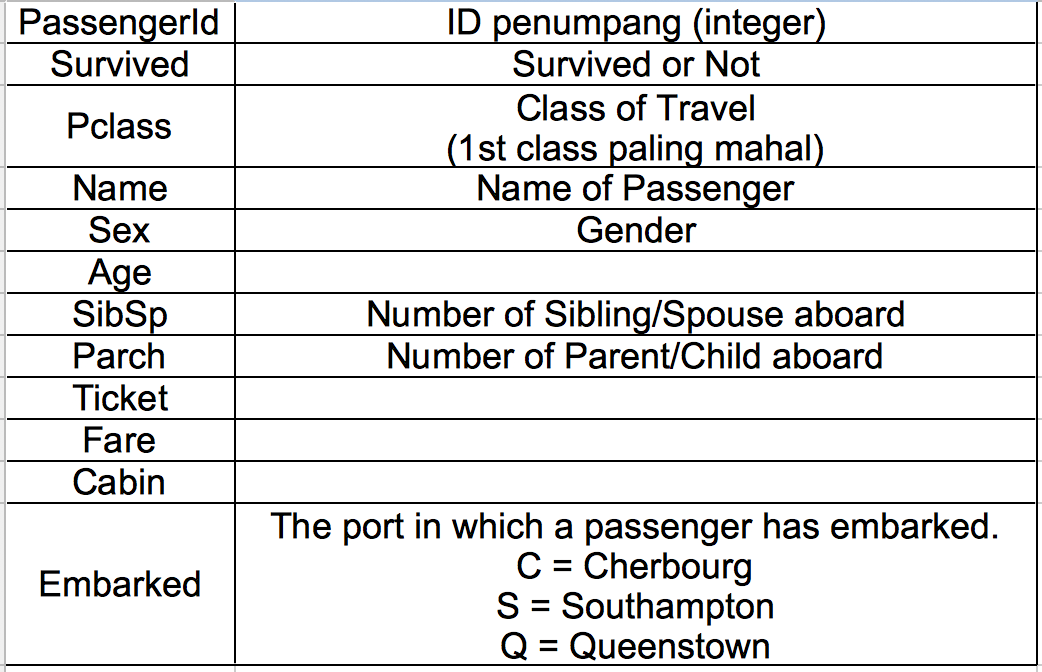

In [11]:
illustration.nomenklatur

# **Exploratory Data Analysis (EDA)**

In [12]:
df.drop(columns=['Name', 'Ticket'], inplace=True) #useless columns

In [13]:
from jcopml.plot import plot_missing_value

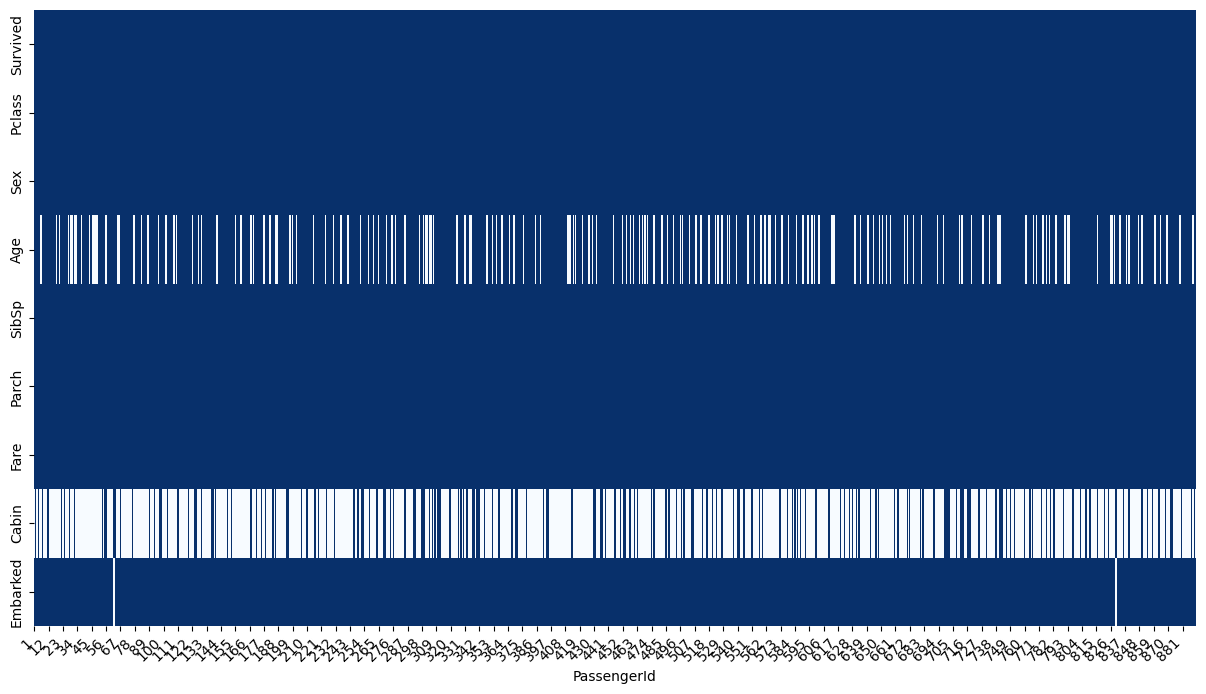

In [14]:
plot_missing_value(df)

**Note** :

So many missing value in Age and Cabin columns, and those columns is useless too, so we can drop it.

In [15]:
df.drop(columns=['Age', 'Cabin'], inplace=True)

In [20]:
df.Sex.value_counts()

,count
Sex,
male,577
female,314


In [16]:
df.Embarked.value_counts()

,count
Embarked,
S,644
C,168
Q,77


**Note** :

In the Embarked colum, we can see that there are 2 missing values shown in the value counts above. Since only 2 values are missing, we can fill them into the majority embarked.

In [22]:
df.fillna({'Embarked' : 'S'}, inplace=True)

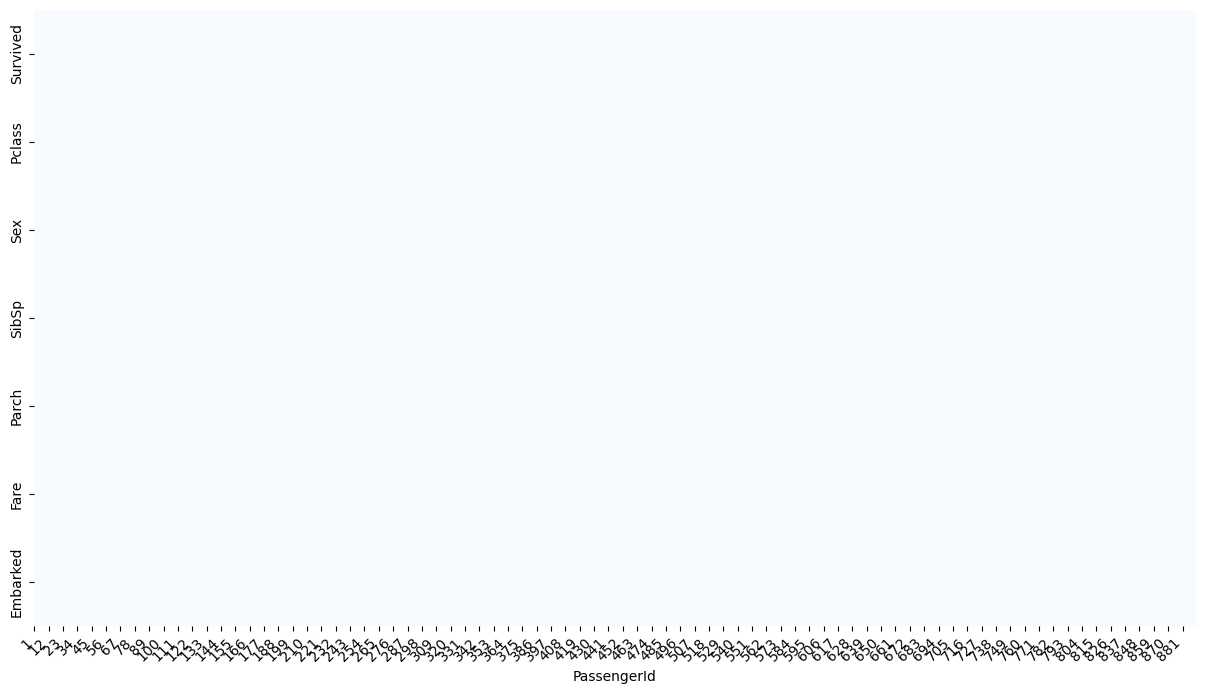

In [23]:
plot_missing_value(df)

# **Preparation Data**

In [24]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [26]:
X = df.drop(columns='Survived')
y = df.Survived

X = pd.get_dummies(X, columns=['Sex', 'Embarked'])

In [44]:
kNN = KNeighborsClassifier(n_neighbors=1) #choose how many n we use
kNN.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [45]:
kNN.score(X, y) #not using data splitting

0.8855218855218855

## **Data Splitting**

In [32]:
X = df.drop(columns='Survived')
y = df.Survived

X = pd.get_dummies(X, dtype='int', columns=['Pclass', 'Sex', 'Embarked'])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 11), (268, 11), (623,), (268,))

In [62]:
kNN2 = KNeighborsClassifier(n_neighbors=1)
kNN2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [63]:
kNN2.score(X_train, y_train), kNN2.score(X_test, y_test)

(0.9036918138041734, 0.7313432835820896)

# **Improvement onto the Data : Feature Scaling**

In [37]:
demo.knn_scaling()

interactive(children=(IntSlider(value=1, description='N', max=11, min=1, step=2), FloatSlider(value=7000000.0,…

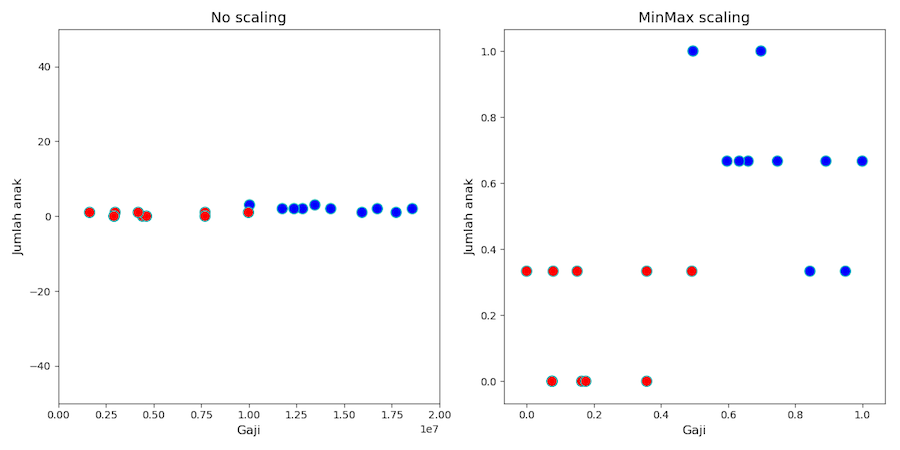

In [39]:
illustration.knn_scaling

**Note** :

We can see in the plot that the y-axis, namely 'Jumlah anak', has a large gap, starting from -40, -20, 0, 20, 40. So we can scale it down to be smaller so that the difference in 'Jumlah anak' column can be cleary seen.

In [65]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
kNN3 = KNeighborsClassifier(n_neighbors=1)
kNN3.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [67]:
kNN3.score(X_train_scaled, y_train), kNN3.score(X_test_scaled, y_test)

(0.9069020866773676, 0.7425373134328358)

**Note** :

Now we can see the improvement of this feature scaling.

# **Improvement onto Model : Parameter Tuning**

### **Tuning n_neighbor without scaling**

In [68]:
neighbor = range(1, 51, 2) #we tuning the best neighbors between 1-51 increments of 2

train_score = []
test_score = []

In [69]:
for k in neighbor:
    kNN4 = KNeighborsClassifier(n_neighbors=k)
    kNN4.fit(X_train, y_train)

    train_score.append(kNN4.score(X_train, y_train))
    test_score.append(kNN4.score(X_test, y_test))

Best test score : 0.7611940298507462
Best n_neighbors : 5


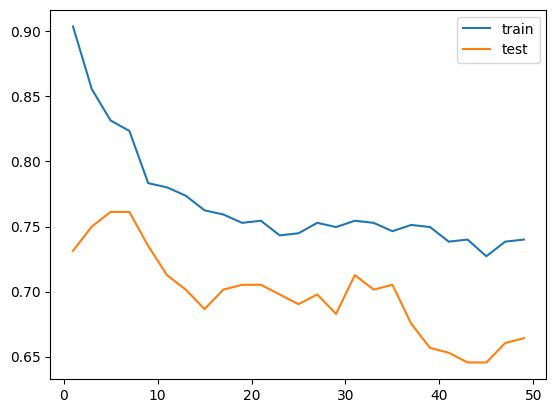

In [70]:
plt.plot(neighbor, train_score, label='train')
plt.plot(neighbor, test_score, label='test')
plt.legend()

print(f'Best test score : {np.max(test_score)}')
print(f'Best n_neighbors : {neighbor[np.argmax(test_score)]}')

## **Tuning n_neighbor with scaling**

In [71]:
neighbor = range(1, 51, 2)

train_score = []
test_score = []

In [72]:
for k in neighbor:
    kNN5 = KNeighborsClassifier(n_neighbors=k)
    kNN5.fit(X_train_scaled, y_train)

    train_score.append(kNN5.score(X_train_scaled, y_train))
    test_score.append(kNN5.score(X_test_scaled, y_test))

Best test score : 0.8208955223880597
Best n_neighbors : 11


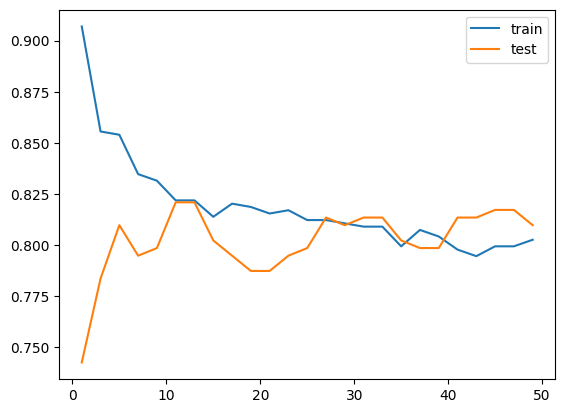

In [73]:
plt.plot(neighbor, train_score, label='train')
plt.plot(neighbor, test_score, label='test')
plt.legend()

print(f'Best test score : {np.max(test_score)}')
print(f'Best n_neighbors : {neighbor[np.argmax(test_score)]}')